In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

happiness_2015 = pd.read_csv('2015.csv')
happiness_2019 = pd.read_csv('2019.csv')

# Introduction
## [Dataset Source](https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv)
Listed below are the two dataset I used for my final project. Both data sets track happiness ratings of countries around the globe. Accoring to the dataset documentation, the data used here was gathered from the Gallup World Poll and the scores are based on answers to evaluation questions asked in a poll distributed to portions of each countries respective populations. 

Along with the happiness scores, the dataset also includes other information from the poll including values that represent a countries freedom, life expectancy, generosity, and more with higher values being more desirable.

In [2]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Visualization of Quantitative Data
This block of code gathers the top ten countries by happiness score and visualizes them in a horizontal bar chart.

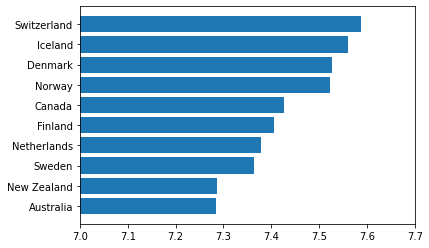

In [4]:
top_ten = happiness_2015.head(10)[::-1]

plt.figure()

plt.barh(top_ten['Country'], top_ten['Happiness Score'])
plt.xlim(7, 7.7)

plt.show()

# Visualization of Categorical Data
This block of code takes the list of the happiest countries in the world in 2015, sorts them by region, and  <br> puts them into a pie chart to visualize how many countries from each region were represented within the dataset.


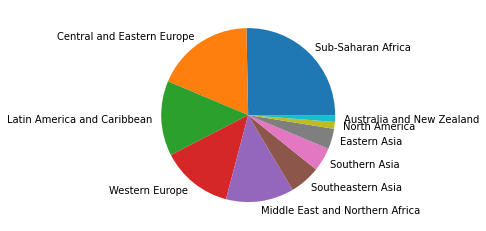

In [9]:
regions = pd.Series(happiness_2015['Region'])
labels = regions.value_counts().index.tolist()
        
plt.figure()
plt.pie(regions.value_counts(), labels=labels)
plt.show()

# Visualization of Grouped Data
This block of code groups all of the countries in the data sets into their respective regions and calculates <br> the average happiness score of each region. The data is visualized using a horizontal bar chart.

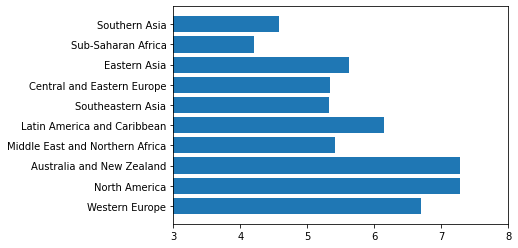

In [6]:
unique_regions = regions.unique()

happiness_by_region = {}

for i in range(len(unique_regions)):
    happiness_by_region.update(
        [(unique_regions[i], happiness_2015[happiness_2015['Region'] == unique_regions[i]]['Happiness Score'].mean())]
    )

keys = list(happiness_by_region.keys())
    
plt.figure()

plt.barh(keys, happiness_by_region.values())
plt.xlim(3, 8)

plt.show()

# Visualization of Date From Joining Two Tables
This visualization joins both the happiness data set from 2015 and 2019. I took the top ten rated countries by happiness in 2015 and then compared their happiness levels in 2015 to their hapiness levels in 2019 and displayed the results utilizing a horizontal bar chart.

In [7]:
top_ten_2015 = pd.DataFrame(top_ten)[::-1]

combined = pd.DataFrame(top_ten_2015['Country'], columns=['Country'])
combined['2015'] = top_ten_2015['Happiness Score']

scores_2019 = np.zeros(len(top_ten_2015))
for i in range(len(top_ten_2015)):
    scores_2019[i] = happiness_2019[happiness_2019['Country or region'] == top_ten_2015['Country'][i]]['Score']

combined['2019'] = scores_2019
combined

,Country,2015,2019
0,Switzerland,7.587,7.480
1,Iceland,7.561,7.494
2,Denmark,7.527,7.600
3,Norway,7.522,7.554
4,Canada,7.427,7.278
5,Finland,7.406,7.769
6,Netherlands,7.378,7.488
7,Sweden,7.364,7.343
8,New Zealand,7.286,7.307
9,Australia,7.284,7.228


<AxesSubplot:title={'center':'Bruh'}, ylabel='Country'>

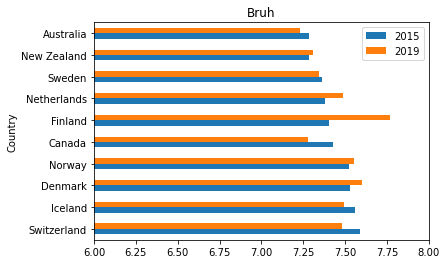

In [8]:
combined.plot(
        x='Country',
        kind='barh',
        stacked=False,
        title='Bruh',
        xlim=(6, 8)
)